# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Task 1 (Remove Customer ID)

In [5]:
df.drop('customerID',axis=1,inplace=True)

In [6]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Task 2 (Identify any int or float values which are used as an object and convert them to float or integer.)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

# Task 3 (Identify the missing values and impute them).

<AxesSubplot:>

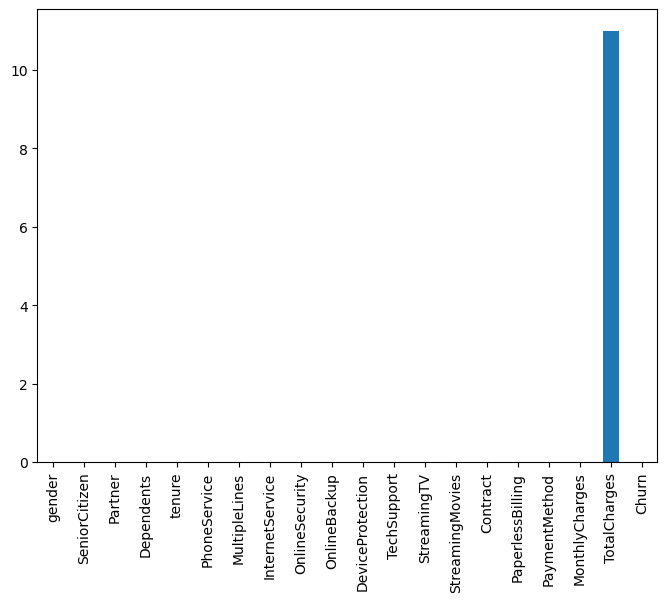

In [9]:
plt.figure(figsize=(8,6),dpi=100)
df.isnull().sum().plot(kind='bar')

In [10]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [12]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# task 4 encode the categorical values to binary integers.

In [13]:
for i in df.columns:
    if df[i].dtypes=='O':
        print(df[i].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV

In [14]:
df['StreamingTV']=df['StreamingTV'].replace({'No internet service':'No'})
df['StreamingMovies']=df['StreamingMovies'].replace({'No internet service':'No'})
df['TechSupport']=df['TechSupport'].replace({'No internet service':'No'})
df['DeviceProtection']=df['DeviceProtection'].replace({'No internet service':'No'})
df['OnlineSecurity']=df['OnlineSecurity'].replace({'No internet service':'No'})
df['MultipleLines']=df['MultipleLines'].replace({'No phone service':'No'})
df['OnlineBackup']=df['OnlineBackup'].replace({'No internet service':'No'})

In [15]:
for i in df.columns:
    if df[i].dtypes=='O':
        print(df[i].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No     4072
Yes    2971
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64
No     4614
Yes    2429
Name: OnlineBackup, dtype: int64
No     4621
Yes    2422
Name: DeviceProtection, dtype: int64
No     4999
Yes    2044
Name: TechSupport, dtype: int64
No     4336
Yes    2707
Name: StreamingTV, dtype: int64
No     4311
Yes    2732
Name: StreamingMovies, dtype: int64
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (au

In [16]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
value_list1=[]
for i in df.columns:
    if (len(df[i].value_counts())<=2) & (df[i].dtypes=='O'):
        print(i+':',len(df[i].value_counts()))
        value_list1.append(i)
value_list1

gender: 2
Partner: 2
Dependents: 2
PhoneService: 2
MultipleLines: 2
OnlineSecurity: 2
OnlineBackup: 2
DeviceProtection: 2
TechSupport: 2
StreamingTV: 2
StreamingMovies: 2
PaperlessBilling: 2
Churn: 2


['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [18]:
value_list2=[]
for i in df.columns:
    if (len(df[i].value_counts())>2) & (df[i].dtypes=='O'):
        print(i+':',len(df[i].value_counts()))
        value_list2.append(i)
value_list2

InternetService: 3
Contract: 3
PaymentMethod: 4


['InternetService', 'Contract', 'PaymentMethod']

In [19]:
value_list3=[]
for i in df.columns:
    if df[i].dtypes!='O':
        print(i+':',len(df[i].value_counts()))
        value_list3.append(i)
value_list3

SeniorCitizen: 2
tenure: 73
MonthlyCharges: 1585
TotalCharges: 6531


['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
df_encoded1=df[value_list1].apply(LabelEncoder().fit_transform)
df_encoded1.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,1,0,1,0,0,0,0,0
2,1,0,0,1,0,1,1,0,0,0,0,1,1
3,1,0,0,0,0,1,0,1,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,1,1


In [22]:
df_encoded2=pd.get_dummies(df[value_list2])
df_encoded2

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,1,0,1,0,0,0
4,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,1,0,0,0,0,1
7039,0,1,0,0,1,0,0,1,0,0
7040,1,0,0,1,0,0,0,0,1,0
7041,0,1,0,1,0,0,0,0,0,1


In [23]:
new_df=df_encoded1.join([df[value_list3],df_encoded2])
new_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [24]:
new_df.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn',
       'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

# task 6: Do visualization between Churn and Tenure.

<AxesSubplot:xlabel='Churn'>

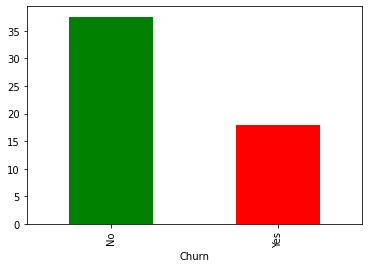

In [25]:
df['tenure'].groupby(by=df['Churn']).mean().plot(kind='bar',color=['green','red'])

# Task 7: Do Visualization between Churn and Customer Monthly charges.

<AxesSubplot:xlabel='Churn'>

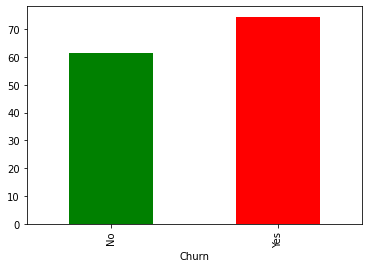

In [26]:
new_df['MonthlyCharges'].groupby(by=df['Churn']).mean().plot(kind='bar',color=['green','red'])

# task 8:Implement Min MAX Scalar.

In [27]:
new_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler=MinMaxScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(new_df[['MonthlyCharges','TotalCharges']]),columns=['MonthlyCharges_s','TotalCharges_s'])

In [30]:
final_df=new_df.join(df_scaled)
final_df

,gender,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges_s,TotalCharges_s
0,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0.115423,0.001275
1,1,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0.385075,0.215867
2,1,0,0,1,0,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0.354229,0.010310
3,1,0,0,0,0,1,0,1,1,0,...,0,0,1,0,1,0,0,0,0.239303,0.210241
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0.521891,0.015330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,1,1,0,1,1,1,...,0,0,1,0,0,0,0,1,0.662189,0.227521
7039,0,1,1,1,1,0,1,1,0,1,...,0,0,1,0,0,1,0,0,0.845274,0.847461
7040,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0.112935,0.037809
7041,1,1,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0.558706,0.033210


In [31]:
final_df.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn',
       'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MonthlyCharges_s', 'TotalCharges_s'],
      dtype='object')

In [32]:
final_df.drop(['MonthlyCharges', 'TotalCharges'],axis=1,inplace=True)

In [33]:
final_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges_s,TotalCharges_s
0,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0.115423,0.001275
1,1,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0.385075,0.215867
2,1,0,0,1,0,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0.354229,0.010310
3,1,0,0,0,0,1,0,1,1,0,...,0,0,1,0,1,0,0,0,0.239303,0.210241
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0.521891,0.015330


# Task 9: divide data into X and y. then train test split.

In [34]:
X=final_df.drop('Churn',axis=1)
y=final_df['Churn']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Task 10: Model Building using Neural Networks

In [48]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(26,), activation='relu'), #input to hidden
    keras.layers.Dense(1, activation='sigmoid')      #Hidden to output
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
177/177 [==============================] - 1s 1ms/step - loss: 0.7612 - accuracy: 0.7547
Epoch 2/5
177/177 [==============================] - 0s 1ms/step - loss: 0.4674 - accuracy: 0.7719
Epoch 3/5
177/177 [==============================] - 0s 1ms/step - loss: 0.4440 - accuracy: 0.7893
Epoch 4/5
177/177 [==============================] - 0s 1ms/step - loss: 0.4319 - accuracy: 0.7948
Epoch 5/5
177/177 [==============================] - 0s 1ms/step - loss: 0.4246 - accuracy: 0.8000


# Task 11: print Classififcation report, Confusion matrix and Accuracy for the model

In [49]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [50]:
y_pred=model.predict(X_test)

In [51]:
y_test

185     1
2715    0
3825    0
1807    1
132     0
       ..
6366    0
315     0
2439    0
5002    0
1161    1
Name: Churn, Length: 1409, dtype: int32

In [52]:
y_pred

array([[0.5526446 ],
       [0.10923171],
       [0.01111004],
       ...,
       [0.0730719 ],
       [0.03244293],
       [0.39679646]], dtype=float32)

In [53]:
predictions=[]
for i in y_pred:
    if i>0.5:
        predictions.append(1)
    else:
        predictions.append(0)

In [54]:
predictions[:5]

[1, 0, 0, 1, 0]

In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.67      0.58      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



<AxesSubplot:>

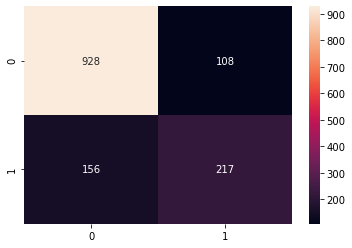

In [56]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='d')

In [57]:
accuracy_score(y_test,predictions)

0.8126330731014905